<a href="https://colab.research.google.com/github/dhillonarman/Optimized-SVM-Letter-Recognition/blob/main/102216076_Parameter_Optimization_of_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.svm import NuSVC
import random


In [6]:
# Dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"

columns = ['letter', 'x-box', 'y-box', 'width', 'height', 'onpix', 'x-bar', 'y-bar',
           'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

df = pd.read_csv(url, names=columns)
df.head()


,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [11]:
# The original dataset is almost balanced so we can reduced the dataset for time reduction
df_sampled = df.groupby("letter", group_keys=False).apply(lambda x: x.sample(n=230, random_state=42)).reset_index(drop=True)

print("Dataset Shape:", df_sampled.shape)
print("\nClass Distribution (Sampled Data):")
print(df_sampled['letter'].value_counts())


X = df_sampled.drop("letter", axis=1)
y = df_sampled["letter"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)


Dataset Shape: (5980, 17)

Class Distribution (Sampled Data):
letter
A    230
B    230
C    230
D    230
E    230
F    230
G    230
H    230
I    230
J    230
K    230
L    230
M    230
N    230
O    230
P    230
Q    230
R    230
S    230
T    230
U    230
V    230
W    230
X    230
Y    230
Z    230
Name: count, dtype: int64


<ipython-input-11-641cc3f95cb5>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby("letter", group_keys=False).apply(lambda x: x.sample(n=230, random_state=42)).reset_index(drop=True)


In [8]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
samples = []
convergence_data = {}

for i in range(10):
    print(f"Processing Sample S{i+1}")
    X_shuffled, y_shuffled = shuffle(X, y_encoded, random_state=i)
    X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.3, random_state=i)

    best_acc = 0
    best_params = None
    acc_progress = []

    for iteration in range(100):
        kernel = random.choice(kernels)
        nu = round(random.uniform(0.01, 0.9), 2)
        gamma = 'scale' if kernel == 'linear' else round(random.uniform(0.001, 1), 3)

        try:
            model = NuSVC(kernel=kernel, nu=nu, gamma=gamma)
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            acc = accuracy_score(y_test, preds)
            acc_progress.append(acc)

            if acc > best_acc:
                best_acc = acc
                best_params = (kernel, nu, gamma)

        except Exception as e:
            acc_progress.append(best_acc)
            continue

    samples.append({
        'Sample': f"S{i+1}",
        'Best Accuracy': round(best_acc * 100, 2),
        'Best SVM Parameters': f"Kernel: {best_params[0]}, Nu: {best_params[1]}, Gamma: {best_params[2]}"
    })

    convergence_data[f"S{i+1}"] = acc_progress


Processing Sample S1
Processing Sample S2
Processing Sample S3
Processing Sample S4
Processing Sample S5
Processing Sample S6
Processing Sample S7
Processing Sample S8
Processing Sample S9
Processing Sample S10


In [9]:
result_df = pd.DataFrame(samples)
print(result_df)

# Saving as CSV file
result_df.to_csv("SVM_Results.csv", index=False)


  Sample  Best Accuracy                   Best SVM Parameters
0     S1          91.08   Kernel: rbf, Nu: 0.12, Gamma: 0.137
1     S2          90.41  Kernel: poly, Nu: 0.02, Gamma: 0.445
2     S3          91.53   Kernel: rbf, Nu: 0.24, Gamma: 0.108
3     S4          92.92   Kernel: rbf, Nu: 0.19, Gamma: 0.055
4     S5          92.14   Kernel: rbf, Nu: 0.17, Gamma: 0.122
5     S6          91.75    Kernel: rbf, Nu: 0.2, Gamma: 0.042
6     S7          91.58   Kernel: rbf, Nu: 0.13, Gamma: 0.101
7     S8          90.58  Kernel: poly, Nu: 0.05, Gamma: 0.877
8     S9          93.20   Kernel: rbf, Nu: 0.17, Gamma: 0.089
9    S10          89.74   Kernel: rbf, Nu: 0.16, Gamma: 0.013


Best Sample: S9


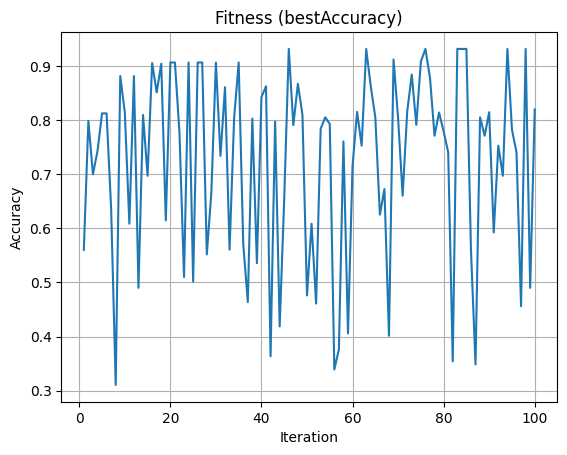

<Figure size 640x480 with 0 Axes>

In [13]:
# Best performing sample
best_sample = result_df.loc[result_df['Best Accuracy'].idxmax(), 'Sample']
print(f"Best Sample: {best_sample}")

plt.plot(range(1, 101), convergence_data[best_sample])
plt.title("Fitness (bestAccuracy)")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

plt.savefig("convergence_plot.png")
